In [1]:
# General Libraries
import pandas as pd
import numpy as np
from itertools import product
import warnings

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import shap #for SHAP values
from pdpbox import pdp, info_plots #for partial plots

In [2]:
df=pd.read_csv('heart.csv')

EDA (ExploratoryData Analysis)

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Description**


ageage in years
sex(1 = male; 0 = female)
cpchest pain type
trestbpsresting blood pressure (in mm Hg on admission to the hospital)
cholserum cholestoral in mg/dl
fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecgresting electrocardiographic results
thalachmaximum heart rate achieved
exangexercise induced angina (1 = yes; 0 = no)
oldpeakST depression induced by exercise relative to rest
slopethe slope of the peak exercise ST segment
canumber of major vessels (0-3) colored by flourosopy
thal3 = normal; 6 = fixed defect; 7 = reversable defect
target1 or 0
Attribute Information:
> 1. age -The person's age in years
> 2. sex  - sex  (1 = male, 0 = female)
> 3. chest pain type (4 values) -  cp (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
> 4. resting blood pressure in mm Hg  - trestbps 
> 5. serum cholestoral in mg/dl - chol
> 6. fasting blood sugar - fbs ( (> 120 mg/dl, 1 = true; 0 = false)
> 7. resting electrocardiographic results (values 0,1,2)  -  restecg ((0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
> 8. maximum heart rate achieved - thalach
> 9. exercise induced angina  - exang (1 = yes; 0 = no)
> 10. oldpeak = ST depression induced by exercise relative to rest - oldpeak ('ST' relates to positions on the ECG plot.)
> 11. the slope of the peak exercise ST segment - slope (Value 1: upsloping, Value 2: flat, Value 3: downsloping) 
> 12. number of major vessels (0-3) colored by flourosopy - ca
> 13. thal - thallium stress result: 3 = normal; 6 = fixed defect; 7 = reversable defect - thal
14. target: Heart disease (0 = no, 1 = yes)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Missing values**

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique()))

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Data Visualisation**

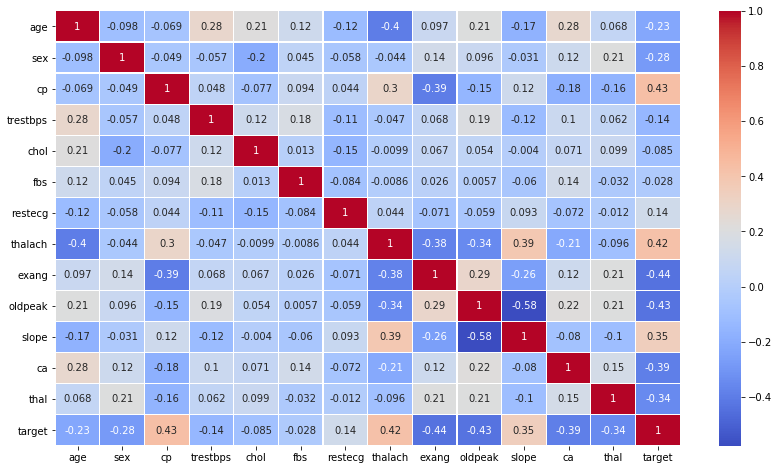

In [10]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

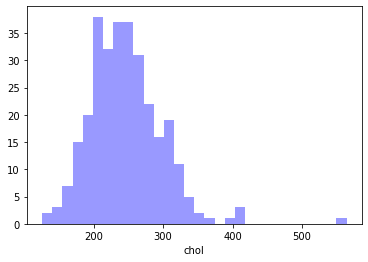

In [11]:
sns.distplot(df['chol'],kde=False,bins=30,color='blue')
plt.show()

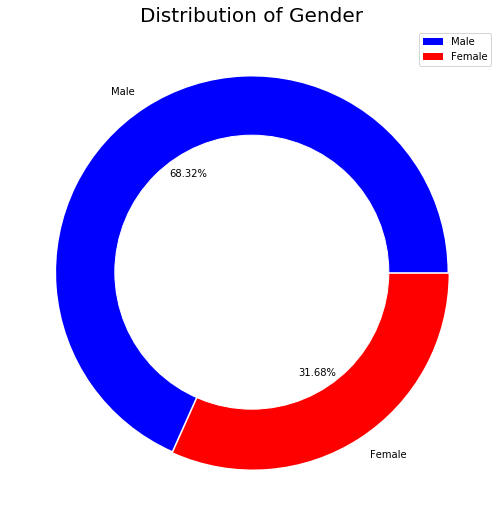

In [12]:
#Distribution of gender among the patients

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(df['sex'].value_counts(), colors = ['b', 'r'], labels = ["Male", "Female"],explode = [0, 0.01], autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

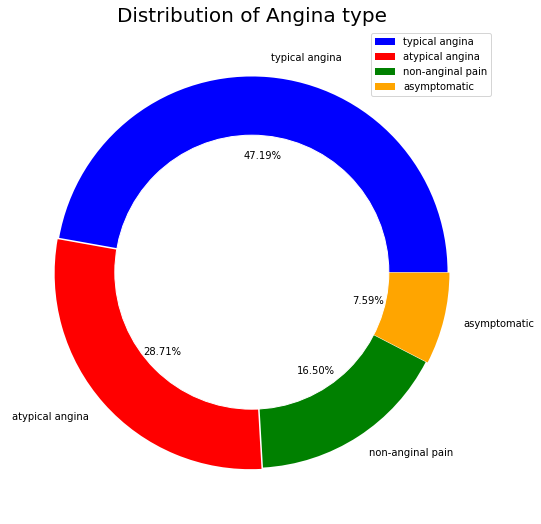

In [13]:
#Distribution of gender among the patients

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(df['cp'].value_counts(), colors = ['b', 'r', 'g','orange'], labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"],explode = [0, 0.01, 0, 0.01], autopct = '%.2f%%')
plt.title('Distribution of Angina type', fontsize = 20)
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

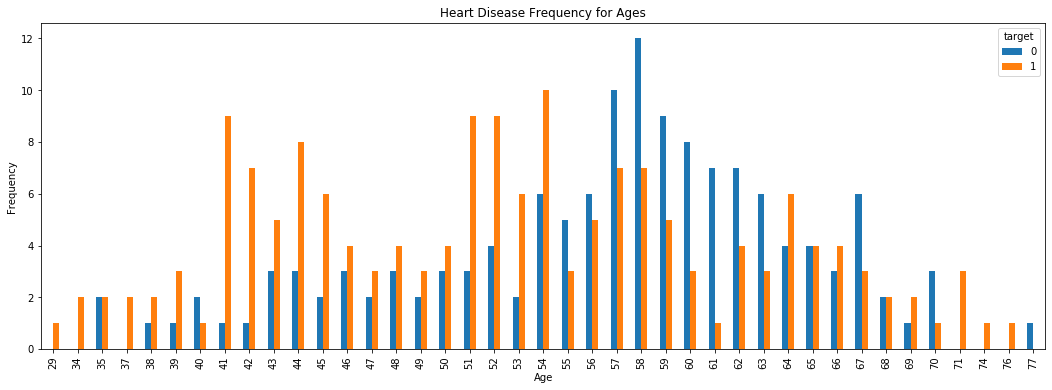

In [14]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(18,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

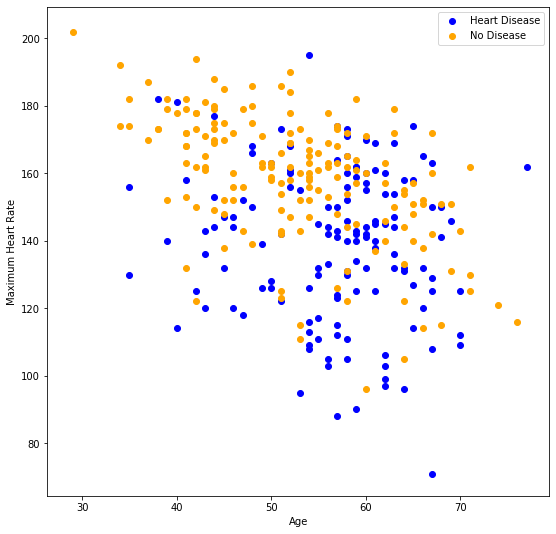

In [15]:
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="blue")
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="orange")
plt.legend(["Heart Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

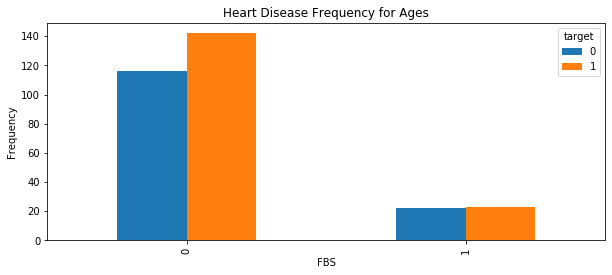

In [16]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(10,4))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('FBS')
plt.ylabel('Frequency')
plt.show()

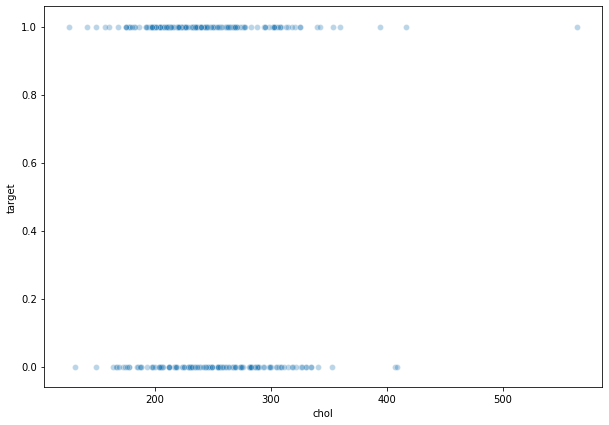

In [17]:
ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x='chol', y='target', data=df, alpha = 0.3)

In [18]:
y = df.target.values
X = df.drop(['target'], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [21]:
lr.fit(X_train, y_train)
## Predict
pred_train_lr = lr.predict(X_train)
pred_test_lr = lr.predict(X_test)

### Train data accuracy
from sklearn.metrics import accuracy_score
print("Accuracy on train is:", accuracy_score(y_train, pred_train_lr))
      
### Test data accuracy
print("Accuracy on test is:", accuracy_score(y_test, pred_test_lr))

Accuracy on train is: 0.8842975206611571
Accuracy on test is: 0.7868852459016393


In [22]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
print(roc_auc_score(y_train, pred_train_lr))
print(roc_auc_score(y_test, pred_test_lr))

0.8749740394600208
0.7881720430107527


In [23]:
def heart_model(model):
    # Checking accuracy
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('accuracy_score',accuracy_score(y_test, pred))
    print('recall_score',recall_score(y_test, pred))
    print('f1_score',f1_score(y_test, pred))
    print('roc_auc_score',roc_auc_score(y_test, pred))
    # confusion matrix
    print('confusion_matrix')
    print(pd.DataFrame(confusion_matrix(y_test, pred)))
    return model

## Random Forest Classification

In [24]:
# random forest
rfc = RandomForestClassifier()
rfc = heart_model(rfc)

accuracy_score 0.8360655737704918
recall_score 0.8666666666666667
f1_score 0.8387096774193549
roc_auc_score 0.8365591397849462
confusion_matrix
    0   1
0  25   6
1   4  26


## KNN Classification

In [25]:
#train model KNN
knn = KNeighborsClassifier()
knn = heart_model(knn)

accuracy_score 0.6557377049180327
recall_score 0.8
f1_score 0.6956521739130435
roc_auc_score 0.6580645161290323
confusion_matrix
    0   1
0  16  15
1   6  24


## Decision Tree Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = heart_model(dtc)

accuracy_score 0.7377049180327869
recall_score 0.7666666666666667
f1_score 0.7419354838709677
roc_auc_score 0.7381720430107528
confusion_matrix
    0   1
0  22   9
1   7  23


Compared to Logistic, Random Forest, KNN, and Decision tree model, Random Forest Model has higher accuracy score. I will work on this model for feature importance and other study.

In [27]:
model =   RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'


In [29]:
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [30]:
import eli5

In [31]:
rfc_gs = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rfc_gs.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

In [33]:
base_imp = imp_df(X_train.columns, rfc_gs.feature_importances_)
base_imp

,feature,feature_importance
0,thal,0.144819
1,thalach,0.135307
2,oldpeak,0.115782
3,ca,0.105560
4,cp,0.094345
5,age,0.089245
6,chol,0.080532
7,trestbps,0.066100
8,exang,0.060841
9,sex,0.042017


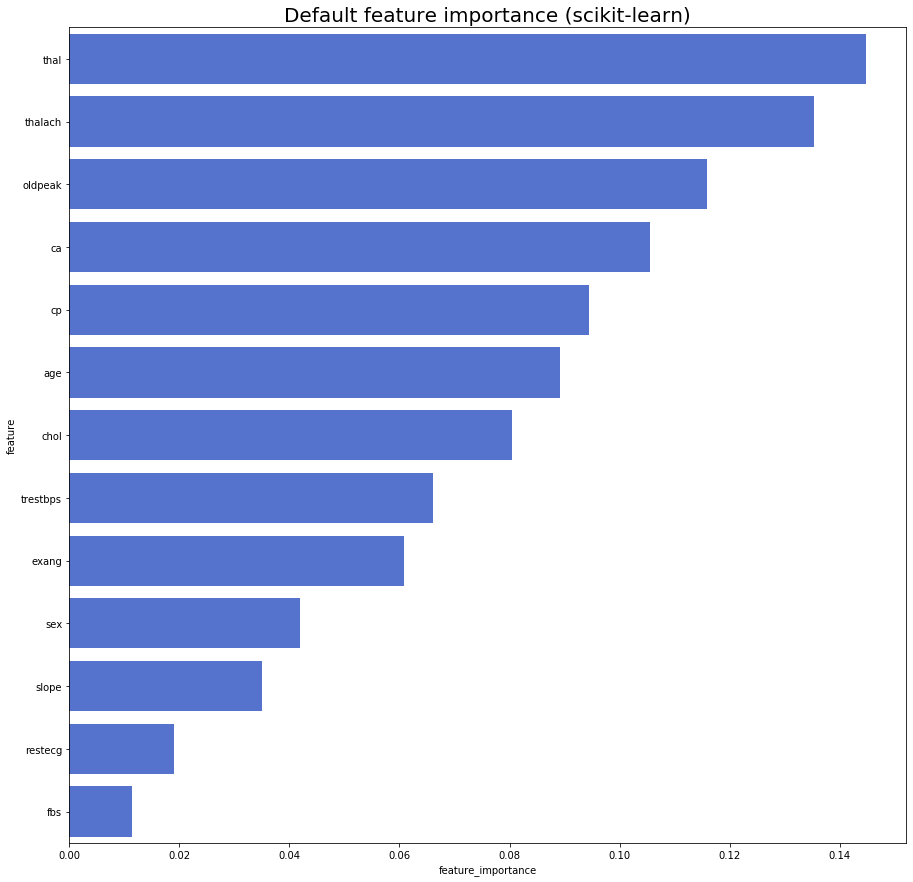

In [34]:
# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)
fig = plt.figure(figsize=(15,15))
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

## Causes for Heart Disease

thal - thallium stress result, thalach - maximum heart rate achieved, oldpeak - ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.), ca - number of major vessels (0-3) colored by flourosopy are important features causing heart disease.

## Partial Dependence Plot

Let's take a closer look at top 4 important features causing heart disease through a Partial Dependence Plot. These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. 

In [35]:
#pip install PDPbox

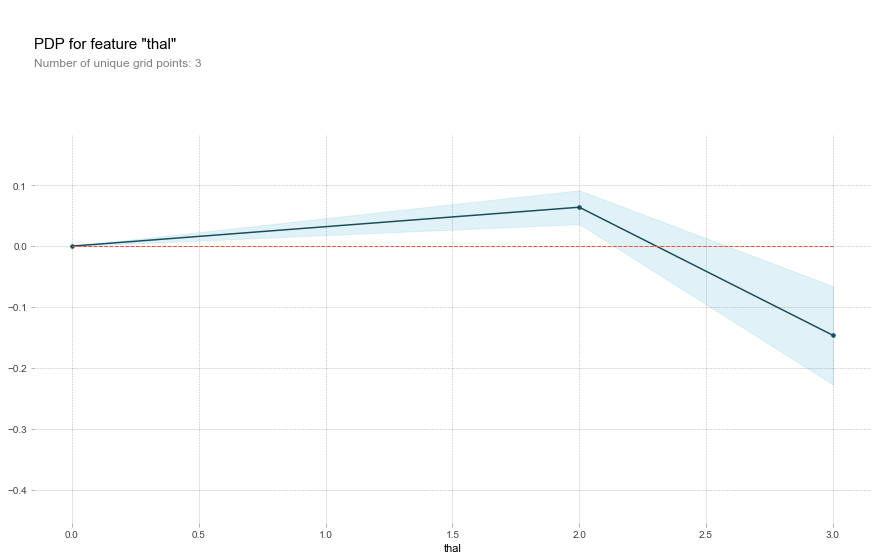

In [36]:
#thallium strss result
base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'thal'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

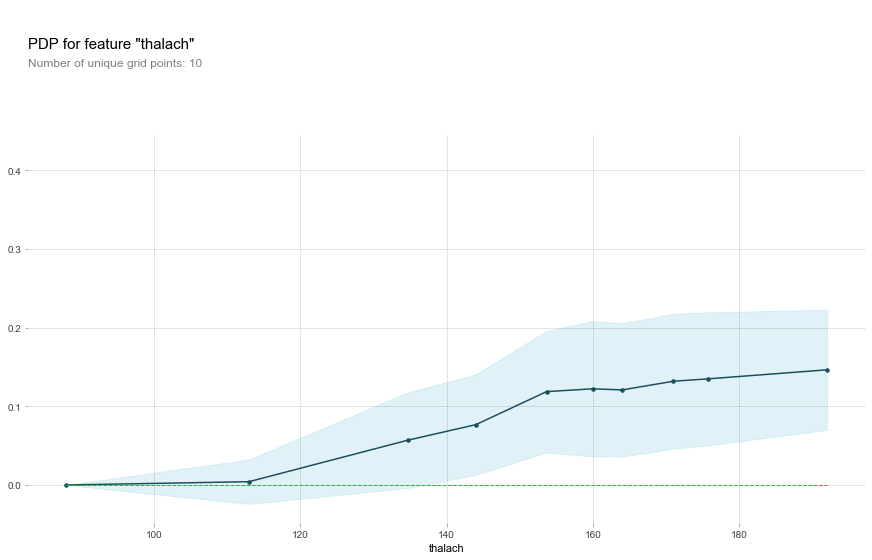

In [37]:
#maximum heart rate achieved
base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'thalach'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

PDP's of heart disease based om maximum heart rate. PDP shows that the probability for heart disease is low at below 90bpm. The maximum of heart rate the probability for heart disease is higher.

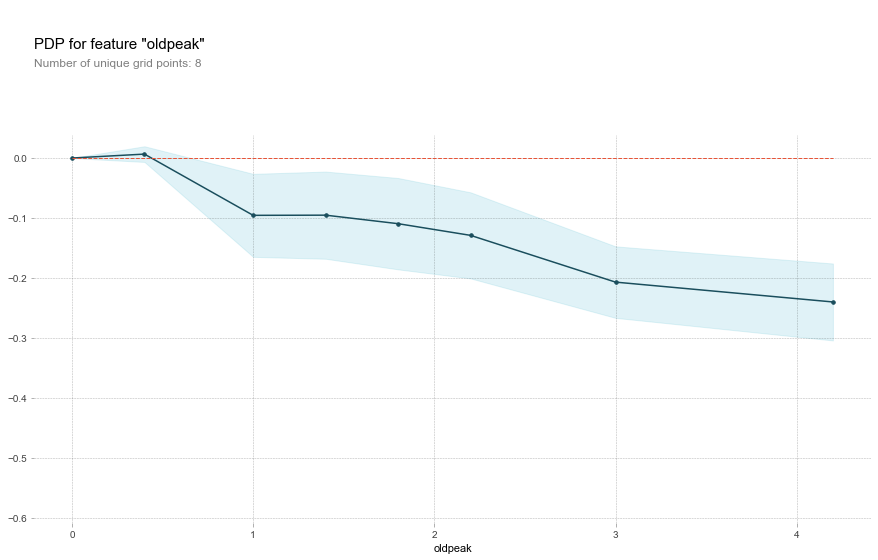

In [38]:
#ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)
base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'oldpeak'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

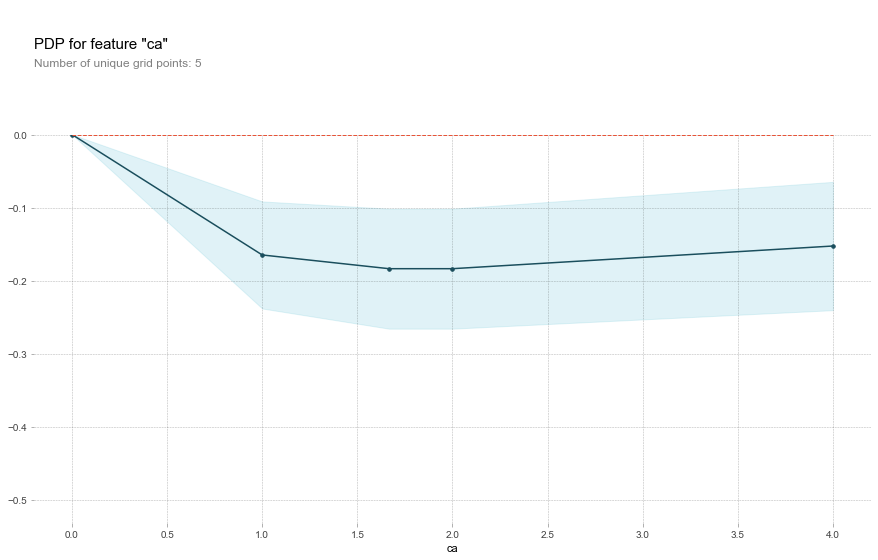

In [39]:
#number of major vessels
base_features = df.columns.values.tolist()
base_features.remove('target')

feat_name = 'ca'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)
pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


Here, I can see that as the number of major blood vessels increases, the probability of heart disease decreases. That makes sense, as it means more blood can get to the heart.

## SHAP (SHapley Additive exPlanations) VALUES

 Shap is a method to explain individual predictions. Shap values work by showing the influence of the values of every variable in a single row, compared to their baseline values.


In [40]:
#pip install shap

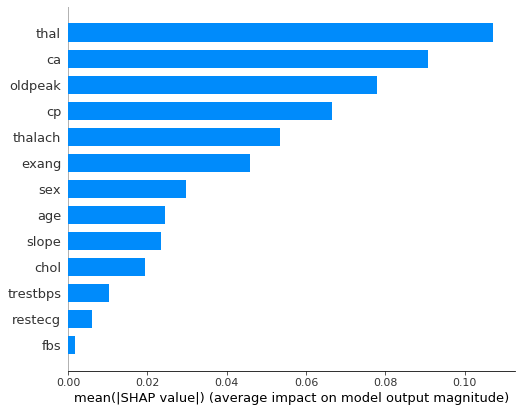

In [41]:
import shap #for SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values((X_test), check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

Thal - thallium stress result is in top

## SHAP Summary Plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

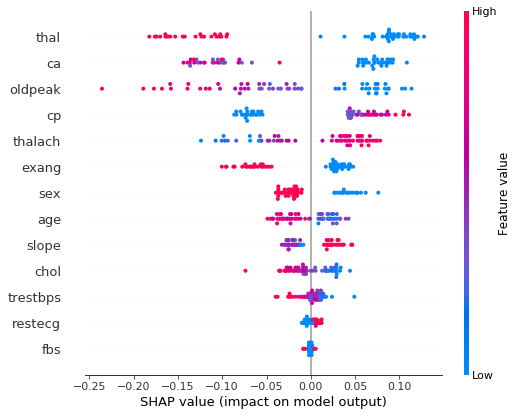

In [42]:
#Summary plot for SHap values
shap.summary_plot(shap_values[1], X_test)